In [1]:
import pandas as pd
import numpy as np
from agent_based_model import *
%load_ext autoreload
%autoreload 2

In [2]:
infected_init_dic = {'H1N1': 10, 'H3N2': 0, 'B': 0}
# alpha -- 78% susceptible
alpha_dic = {'H1N1': 0.78, 'H3N2': 0.74, 'B': 0.6} # H1N1 was 0.78
lmbd = 0.3 # was 0.3
num_runs = 1

strains_keys = ['H1N1', 'H3N2', 'B']

# in data folder schould be 3 files: 'people.txt', 'households.txt', 'schools.json'
data_path = 'chelyabinsk_10/'
results_dir = 'chelyabinsk_10_res20/'

if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    print("Directory created successfully!")
else:
    print("Directory already exists!")
# sys.exit()

data, households, dict_school_id = load_data(data_path)
data, households, dict_school_id = preprocess_data(
    data, households, dict_school_id)
dict_school_len = [len(dict_school_id[i])
                   for i in dict_school_id.keys()]
data = set_initial_values(data, strains_keys, alpha_dic)

Directory created successfully!


In [3]:
data.shape

(355359, 10)

In [5]:
data_folder = 'chelyabinsk_10_res_10i/'
days = range(40)
for i in range(0,1):
    results_dic, number_seed, lmbd, SEIRb_day0 = main_function(
                    i, data_folder=data_folder, dataset=data,
                  dict_school_id_all=dict_school_id, lmbd=lmbd, 
                  infected_init_dic=infected_init_dic,
                  days=days, dict_school_len=dict_school_len)

63 44850


100%|██████████| 3/3 [00:00<00:00,  7.28it/s]


All inf:  10
day 0, H1N1: new I 10 (all I 10, all S 277168), beta: -0.10000000
day 0, H3N2: new I 0 (all I 0, all S 262966), beta: -inf
day 0, B: new I 0 (all I 0, all S 213215), beta: -inf

Proc MainProcess, Day 0, time elapsed: 0.6892641999984335 sec
All inf:  12
day 1, H1N1: new I 0 (all I 10, all S 277146), beta: 0.00000794
day 1, H3N2: new I 0 (all I 0, all S 262966), beta: nan
day 1, B: new I 0 (all I 0, all S 213215), beta: nan

Proc MainProcess, Day 1, time elapsed: 0.6873272000011639 sec
All inf:  34
day 2, H1N1: new I 2 (all I 12, all S 277139), beta: 0.00000210
day 2, H3N2: new I 0 (all I 0, all S 262966), beta: nan
day 2, B: new I 0 (all I 0, all S 213215), beta: nan

Proc MainProcess, Day 2, time elapsed: 0.5849692000010691 sec
All inf:  41
day 3, H1N1: new I 22 (all I 34, all S 277109), beta: 0.00000318
day 3, H3N2: new I 0 (all I 0, all S 262966), beta: nan
day 3, B: new I 0 (all I 0, all S 213215), beta: nan

Proc MainProcess, Day 3, time elapsed: 0.8274610000007669 sec

<Axes: >

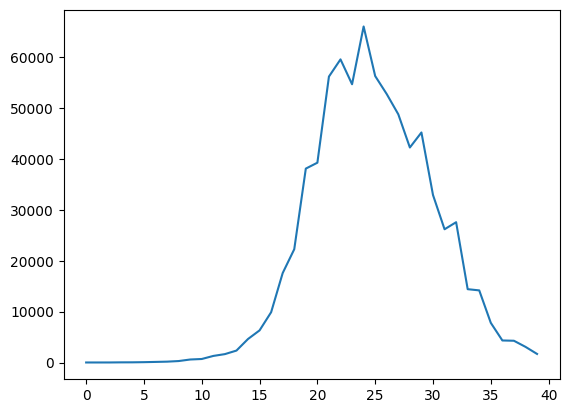

In [6]:
SEIRb_day0.iloc[:,2].plot()

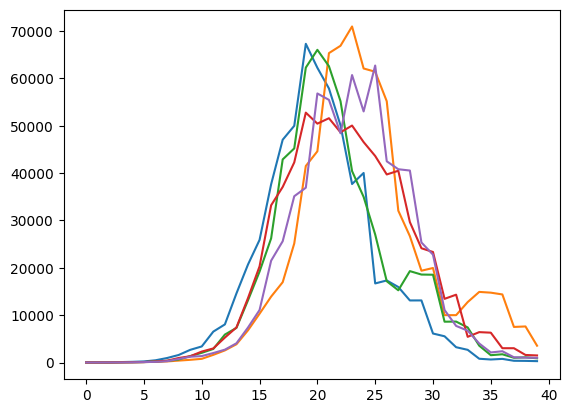

In [6]:
for i in range(5):
    df = pd.read_csv(f'chelyabinsk_10_res/seirb_seed_{i}.csv',
                    sep='\t')
    df.I_H1N1.plot()